# Обработка статистики результатов speed dating в 2002-2004 годах.

Эти данные были собраны у участников экспериментальных мероприятий speed dating в 2002-2004 годах. Во время мероприятий у участников будет четырехминутное "первое свидание" с каждым другим участником противоположного пола. По истечении четырех минут участников спросили, хотели бы они снова встретиться со своим кавалером. Их также попросили оценить свое свидание по шести признакам: привлекательность, искренность, интеллект, веселье, амбиции и общие интересы. Набор данных также включает данные анкеты, собранные от участников на разных этапах процесса. К этим областям относятся: демография, привычки в свиданиях, самовосприятие по ключевым признакам, убеждения в том, что другие находят ценным в партнере, и информация об образе жизни.

Цель работы : Проанализировать имеющиеся данные и сделать предсказание о том, хотели бы 2 участника свидания встретиться снова,
    с помощью машинного обучения на основе модели ______________

Задачи работы:

    1) Проанализировать имеющиеся данные.
    2) Визуализировать признаки с целью их более подробного анализа.
    3) Изменить тип признаков для дальнейшей работы.
    4) Провести корреляционный анализ.
    5) Подтвердить или опровергнуть выдвинутую гипотезу (ниже).
    6) Подготовить данные для машинного обучения с учителем.
    7) Протестировать две выбранные модели.
    8) Оценить эффективность работы модели с помощью R2.
    9) Выбрать лучшую модель, по результатам оценки показателей.
    10) Поработать с параметрами выбранной модели, с целью улучшения ее предсказаний.
    11) Сделать предсказание на более настроенной модели.
    12) Сравнить показатели у одной и той же модели до настройки и после. 
    13) Визуализировать получившиеся результаты.
    14) Сделать резюме проделанной работы. 
    
    Гипотеза Но : 2 участника четырехминутной сессии захотят пойти на второе свидание

    Гипотеза H1 : 2 участника четырехминутной сессии не проявили симпатии и не захотят встретиться снова

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score as r2
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

import re
import random
import warnings
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [47]:
from IPython.display import display
from ipywidgets import Button 
from ipywidgets import Button, Layout

In [48]:
# сбросим ограничения на вывод строк и столбцов. мне это удобнее для чтения
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [49]:
df = pd.read_csv('speeddating.csv')

## 1) Проанализировать имеющиеся данные и подготовить их

### 1.1 Предварительный анализ и очистка

In [50]:
df.shape # узнаем размер датафрейма

(8378, 123)

Набор данных Speeddating.csv содержит 8378 наблюдений (строки) и 123 признака (столбцы).
Очевидно, что в ходе предварительного анализа некоторые столбцы будет разумно удалить - это ускорит работу программы, 
но для этого необходимо будет понять, какие из них меньше всего влияют на результат.

In [51]:
df.head(5)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',

Анализируем и чистим 
Мы можем сначала смело удалить первые два столбца - первый это просто пустые значения (has_null), 
второй - волна (wave), означает пересадку участника через 4 минуты за столик к новому партнеру. 
Для нас он не важен, так как в строке по каждому участнику есть вся информация о его партнере и также то, есть match или нет,
а каждого участника мы будем оценивать отдельно (нас интересуют все 8 с коп. тыс. свиданий, а не волны)

In [52]:
df = df.drop(columns='has_null') 
df = df.drop(columns='wave') 

In [53]:
df_columns = df.columns
print('\n'.join(df_columns))

gender
age
age_o
d_age
d_d_age
race
race_o
samerace
importance_same_race
importance_same_religion
d_importance_same_race
d_importance_same_religion
field
pref_o_attractive
pref_o_sincere
pref_o_intelligence
pref_o_funny
pref_o_ambitious
pref_o_shared_interests
d_pref_o_attractive
d_pref_o_sincere
d_pref_o_intelligence
d_pref_o_funny
d_pref_o_ambitious
d_pref_o_shared_interests
attractive_o
sinsere_o
intelligence_o
funny_o
ambitous_o
shared_interests_o
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
attractive_important
sincere_important
intellicence_important
funny_important
ambtition_important
shared_interests_important
d_attractive_important
d_sincere_important
d_intellicence_important
d_funny_important
d_ambtition_important
d_shared_interests_important
attractive
sincere
intelligence
funny
ambition
d_attractive
d_sincere
d_intelligence
d_funny
d_ambition
attractive_partner
sincere_partner
intelligence_partner
funny_partner
ambition_partner
sha

In [54]:
df.shape

(8378, 121)

итак, от двух несущественных столбцов мы избавились.
Теперь узнаем число строк с пропусками, и если их число по нашему мнению будет несущественно, удалим их. Уверен,
что это можно сделать уже сейчас, до подготовки датафрейма для обучения. (Можешь начать с простого - начни с простого)))

Узнаем, сколько строк останется после удаления пропусков (выполним без знака равенства - не будем перезаписывать ДФ)

In [55]:
test_df = df.dropna()
test_df.shape

(1048, 121)

итак, на выходе мы получим всего 1048 чистых строк. Это даже меньше 20% от исходного, что нас не устраивает.
Будем бороться и мыслить логично. Придется узнать, в каких столбцах есть пропуски (возможно их будет проще удалить, если они не важны, а возможно и заполнить, например, бинарными значениями, чтобы не снижать точность)

In [56]:
del test_df # удалим лишнее из памяти

In [57]:
df2 = df.copy() # кстати, сохраним исходник на всякий случай

In [58]:
df.describe() # (include = "all")

,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.0000

мы получили статистику по всем столбцам. Проанализируем ее. Пока что очень интересно, но ничего не понятно, будем визуализировать.

попробуем узнать число пропусков по строкам

created missing indicator for: age
created missing indicator for: age_o
created missing indicator for: importance_same_race
created missing indicator for: importance_same_religion
created missing indicator for: pref_o_attractive
created missing indicator for: pref_o_sincere
created missing indicator for: pref_o_intelligence
created missing indicator for: pref_o_funny
created missing indicator for: pref_o_ambitious
created missing indicator for: pref_o_shared_interests
created missing indicator for: attractive_o
created missing indicator for: sinsere_o
created missing indicator for: intelligence_o
created missing indicator for: funny_o
created missing indicator for: ambitous_o
created missing indicator for: shared_interests_o
created missing indicator for: attractive_important
created missing indicator for: sincere_important
created missing indicator for: intellicence_important
created missing indicator for: funny_important
created missing indicator for: ambtition_important
created miss

<AxesSubplot:xlabel='index'>

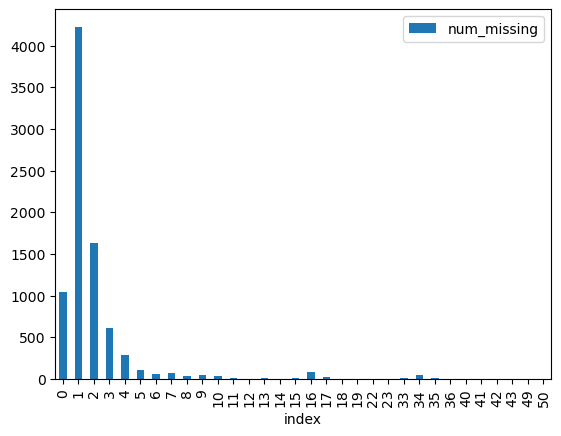

In [59]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

видим, что чуть более 500 строк имеют 3 и более пропусков одновременно. учитывая общий объем массива данных логично их отбросить- это незначительно повлияет на размер датасета, а их заполнение могло бы исказить итоговую картину

In [60]:
df.isnull().sum()

gender                                        0
age                                          95
age_o                                       104
d_age                                         0
d_d_age                                       0
race                                          0
race_o                                        0
samerace                                      0
importance_same_race                         79
importance_same_religion                     79
d_importance_same_race                        0
d_importance_same_religion                    0
field                                         0
pref_o_attractive                            89
pref_o_sincere                               89
pref_o_intelligence                          89
pref_o_funny                                 98
pref_o_ambitious                            107
pref_o_shared_interests                     129
d_pref_o_attractive                           0
d_pref_o_sincere                        

In [61]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df[df['num_missing'] > 3].index
df = df.drop(ind_missing, axis=0)

In [62]:
df.shape

(7508, 179)

In [63]:
# чистим получившийся "хвост" 
df = df.iloc[: , :121]

In [64]:
df.shape

(7508, 121)

взглянем на количество пропусков в столбцах

In [65]:
df.isnull().sum()

gender                                0
age                                   6
age_o                                22
d_age                                 0
d_d_age                               0
race                                  0
race_o                                0
samerace                              0
importance_same_race                  0
importance_same_religion              0
d_importance_same_race                0
d_importance_same_religion            0
field                                 0
pref_o_attractive                     0
pref_o_sincere                        0
pref_o_intelligence                   0
pref_o_funny                          7
pref_o_ambitious                     13
pref_o_shared_interests              32
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0
d_pref_o_ambitious                    0
d_pref_o_shared_interests             0


Как мы видим из анализа количества пропусков, в датасете, у нас есть колонка со значением 5821. Очевидно, что чем бы мы не попытались ее заполнить, это исказит картину исследования, поэтому ее и зависящую от нее интервальную колонку логичнее удалить

In [66]:
df = df.drop(columns='expected_num_interested_in_me') 
df = df.drop(columns='d_expected_num_interested_in_me') 

Что интересно, в датасете много "почти одинаковых" столбцов. Почти. Потому что в одних содержатся числовые характеристики из анкет, а в других - те же самые, но загнанные в интервалы. Пример ниже.

In [67]:
print(df.sinsere_o.unique())
print(df.d_sinsere_o.unique())

[ 8.  10.   7.   6.   9.   3.   5.   4.   1.   2.   nan  8.5  0.   7.5]
["b'[6-8]'" "b'[9-10]'" "b'[0-5]'"]


### 1.2 Визуализация

Выборочно взглянем на столбцы с пропусками с помощью графиков 

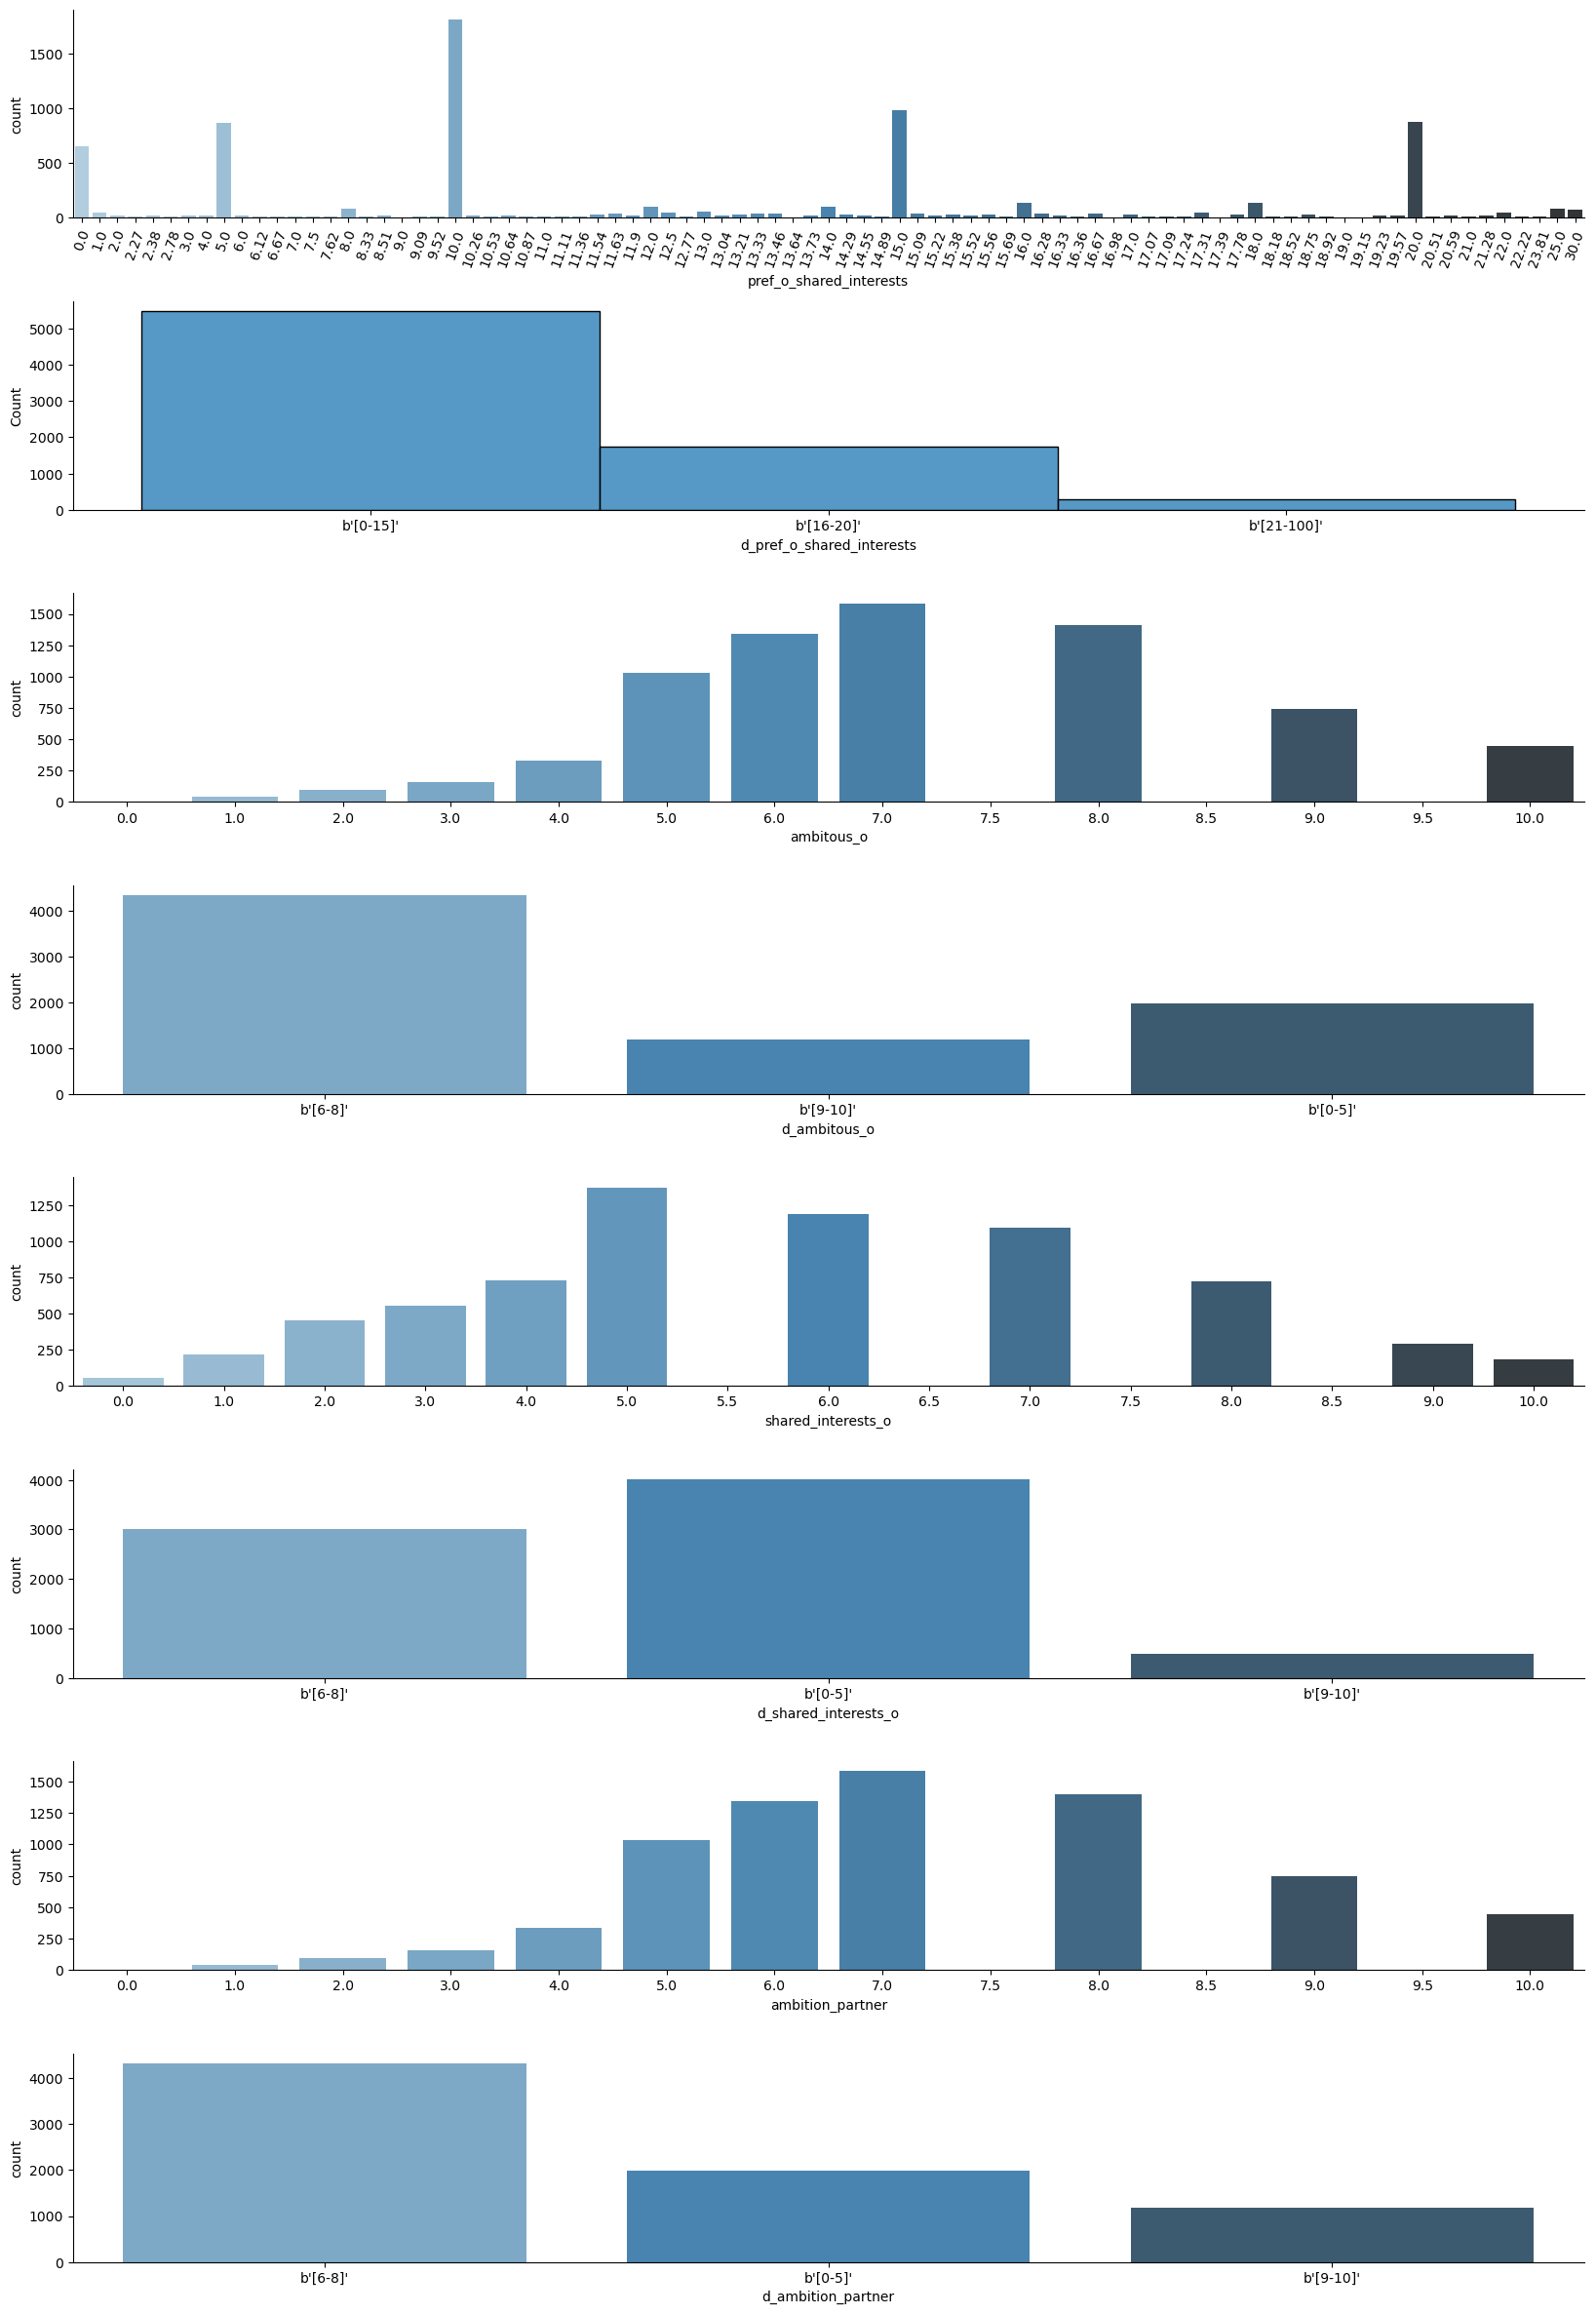

In [68]:
fig = plt.figure(figsize = (20, 30))
gs = fig.add_gridspec(8, 1) 
ax = [None for _ in range(10)]

ax[0] = plt.subplot2grid((8,1), (0,0), colspan=2)
sns.countplot(df['pref_o_shared_interests'], palette="Blues_d")
sns.despine(top=True, right=True)
plt.xticks(rotation=70)

ax[1] = plt.subplot2grid((8,1), (1,0), colspan=2) 
sns.histplot(df['d_pref_o_shared_interests'], palette="Blues_d")
sns.despine(top=True, right=True)

ax[2] = plt.subplot2grid((8,1), (2,0), colspan=2)
sns.countplot(df['ambitous_o'], palette="Blues_d")
sns.despine(top=True, right=True)

ax[3] = plt.subplot2grid((8,1), (3,0), colspan=2)
sns.countplot(df['d_ambitous_o'], palette="Blues_d")
sns.despine(top=True, right=True)

ax[4] = plt.subplot2grid((8,1), (4,0), colspan=2) 
sns.countplot(df['shared_interests_o'], palette="Blues_d")
sns.despine(top=True, right=True)

ax[5] = plt.subplot2grid((8,1), (5,0), colspan=2)   
sns.countplot(df['d_shared_interests_o'], palette="Blues_d") 
sns.despine(top=True, right=True)

ax[6] = plt.subplot2grid((8,1), (6,0), colspan=2)   
sns.countplot(df['ambition_partner'], palette="Blues_d") 
sns.despine(top=True, right=True)

ax[7] = plt.subplot2grid((8,1), (7,0), colspan=2)   
sns.countplot(df['d_ambition_partner'], palette="Blues_d") 
sns.despine(top=True, right=True)

plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

Считаю, что интервалы могут отказаться слишком неинформативными, так как разбивают числовые значения на 
большие и временами неоднозначные группы (например, от 21 до 100), что может ввести в заблуждение. Я принял решение работать с числовыми.

Порядок работы:
1. Заполняем пропуски в числовых, используя данные из соотв. интервальных 
2. В нужных для работы объектовых столбцах преобразуем данные

### 1.3 Заполнение пропусков

Наиболее просто заполнить пропуске в столбцах "age" и "age_o". Заполним их медианными значениями, т.к. по этим признаками они до десятых долей совпадают со средними. Кроме того медиана более устойчива к выбросам, и наиболее подходит для линейной регрессии, которая, в свою очередь, чувствительна к ним.

In [69]:
df["age"] = df["age"].fillna(df["age"].median())
df["age_o"] = df["age_o"].fillna(df["age_o"].median())

Далее заполняем пропуски в числовых столбцах, которым соответствуют интервалы
Для теста выведем все строки со значением "Nan" по категории ["pref_o_shared_interests"] (для примера и проверки)

In [70]:
df.loc[df["pref_o_shared_interests"].isnull()]

,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
1663,b'female',20.0,26.0,20.0,b'[7-37]',b'Other',b'European/Caucasian-American',b'0',1.0,1.0,b'[0-1]',b'[0-1]',b'Sociology',40.0,20.0,20.0,20.0,NaN,NaN,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',9.0,8.0,9.0,10.0,8.0,8.0,b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',15.0,15.0,20.0,25.0,10.0,15.0,b'[0-15]',b'[0-15]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',9.0,10.0,9.0,9.0,9.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',7.0,7.0,6.0,7.0,6.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',8.0,3.0,8.0,5.0,7.0,8.0,8.0,8.0,9.0,9.0,3.0,8.0,8.0,9.0,10.0,4.0,6.0,b'[6-8]',b'[0-5]',b'[6-8]',b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[0-5]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[0-5]',b'[6-8]',0.31,b'[0-0.33]',4.0,8.0,b'[0-4]',b'[5-18]',7.0,7.0,b'[6-8]',b'[7-10]',0.0,b'1',b'1',b'1'
1664,b'female',20.0,20.0,0.0,b'[0-1]',b'Other',b'Asian/Pacific Islander/Asian-American',b'0',1.0,1.0,b'[0-1]',b'[0-1]',b'Sociology',80.0,10.0,10.0,NaN,NaN,NaN,b'[21-100]',b'[0-15]',b'[0-15]',b'[0-15]',b'[0-15]',b'[0-15]',5.0,5.0,5.0,2.0,1.0,2.0,b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',15.0,15.0,20.0,25.0,10.0,15.0,b'[0-15]',b'[0-15]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',9.0,10.0,9.0,9.0,9.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',8.0,8.0,8.0,8.0,8.0,8.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',8.0,3.0,8.0,5.0,7.0,8.0,8.0,8.0,9.0,9.0,3.0,8.0,8.0,9.0,10.0,4.0,6.0,b'[6-8]',b'[0-5]',b'[6-8]',b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[0-5]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[0-5]',b'[6-8]',0.19,b'[0-0.33]',4.0,8.0,b'[0-4]',b'[5-18]',7.0,5.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1673,b'female',21.0,26.0,21.0,b'[7-37]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',3.0,8.0,b'[2-5]',b'[6-10]',b'Economics',40.0,20.0,20.0,20.0,NaN,NaN,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',7.0,8.0,8.0,7.0,7.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,15.0,25.0,25.0,15.0,5.0,b'[0-15]',b'[0-15]',b'[21-100]',b'[21-100]',b'[0-15]',b'[0-15]',8.0,10.0,10.0,8.0,9.0,b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',6.0,9.0,7.0,8.0,7.0,9.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',5.0,3.0,7.0,10.0,9.0,8.0,7.0,2.0,6.0,8.0,7.0,10.0,10.0,9.0,10.0,10.0,7.0,b'

Обратим внимание на то, что каждому пропуску в интересующем столбце соответствует значение интервала "0-15" в столбце ["d_pref_o_shared_interests"], который показывает интервальные значения для первого.
Пропущенные значения буду заполнять рандомными по интервалу.

In [71]:
df["pref_o_shared_interests"] = df2["pref_o_shared_interests"]

In [72]:
print("Zeros_before:", df["pref_o_shared_interests"].isnull().sum()) 

Zeros_before: 32


In [73]:
rnum = random.randint(0,15)
print("Randomizer:", rnum)
df["pref_o_shared_interests"] = df["pref_o_shared_interests"].fillna(rnum)
print("Zeros after:", df["pref_o_shared_interests"].isnull().sum()) 

Randomizer: 6
Zeros after: 0


Все получилось, далее действую аналогично, но для облегчения задачи напишем функцию. В ней заполнение соолбца met пропишем отдельно - у него нет интервального аналога. Его медиана "0", так что ей и заполню - видимо большинство участников ранее не встречались.

In [74]:
# функция замены пустых значений в числовых столбцах
button1 = Button(description="Заполнение столбцов", button_style='success', 
                 layout=Layout(width='30%', height='60px'))

def nan_checkout(by_button): # Описываем обработчик события
    nan_dict = {} # Словарь заголовок : число пропусков
    col_list = df.columns.values.tolist() # Список из заголовков столбцов
    
    for i in col_list: # Заполнение словаря по условию
        isnull_sum = df[i].isnull().sum()
        if isnull_sum != 0:
            nan_dict[i] = isnull_sum
            
    print("Zeros_before:\n")
    for key,value in nan_dict.items(): # Вывод
        print(key, ':', value)
        
    print('\n\n')
    
    print("d_col_list:\n")
    nan_col_list = list(nan_dict.keys()) # список имен столбцов с пропусками
    d_col_list = []
    for col in nan_col_list:
        if col != "met": # не имеет интервального аналога что приведет к ошибке
            d_col_name = "d_" + col # возвращает значение интервального столбца
            d_col_list.append(d_col_name) # и присоединяет его к списку
    for i in d_col_list:
        print(i)
    print('\n')
    
    # вложенная функция для заполнения
    def nan_replacement():
        nan_col_list = list(nan_dict.keys()) # список имен столбцов с пропусками
        for col in nan_col_list:
            if col != "met": # не имеет интервального аналога что приведет к ошибке
                d_col = "d_" + col # возвращает значение интервального столбца
            print(col)
            # минимальный интервал 
            intervals = list(df[d_col].unique())
            intervals.sort()
            print(intervals)
            n = max([int(i) for i in (re.findall(r'\d*\.\d+|\d+', intervals[0]))])
            print('max for randomizer from interval:', n)
            ran_num = random.randint(0,n)
            print('randomized numer:', ran_num)
            print('\n')
    
            # заполнение пустых значений и возврат из функции
            df[col] = df[col].fillna(ran_num)
            
        # мет заполняется отдельно - медианой вне цикла
        df["met"] = df["met"].fillna(df["met"].median())
            
    nan_replacement() # вызов вложенной функции
    
    check_dict = {} # контрольный список
    for i in col_list:
        isnull_sum = df[i].isnull().sum()
        check_dict[i] = isnull_sum
        
    for key,value in check_dict.items(): # Вывод
        print(key, ':', value)

In [75]:
button1.on_click(nan_checkout) 

display(button1) 

Button(button_style='success', description='Заполнение столбцов', layout=Layout(height='60px', width='30%'), s…

Zeros_before:

pref_o_funny : 7
pref_o_ambitious : 13
attractive_o : 9
sinsere_o : 31
intelligence_o : 29
funny_o : 55
ambitous_o : 317
shared_interests_o : 628
funny_important : 7
ambtition_important : 13
shared_interests_important : 32
attractive_partner : 8
sincere_partner : 29
intelligence_partner : 30
funny_partner : 57
ambition_partner : 322
shared_interests_partner : 639
expected_num_matches : 979
like : 15
guess_prob_liked : 64
met : 142



d_col_list:

d_pref_o_funny
d_pref_o_ambitious
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
d_funny_important
d_ambtition_important
d_shared_interests_important
d_attractive_partner
d_sincere_partner
d_intelligence_partner
d_funny_partner
d_ambition_partner
d_shared_interests_partner
d_expected_num_matches
d_like
d_guess_prob_liked


pref_o_funny
["b'[0-15]'", "b'[16-20]'", "b'[21-100]'"]
max for randomizer from interval: 15
randomized numer: 13


pref_o_ambitious
["b'[0-15]'", "b'[16-20]'", "b'[21-

победа: пропуски заполнены. Сразу отмечу, что в этом анализе я принципиально не буду убирать выбросы, так как  они тоже важы: если участник по нескольким показателям ставит собеседнику ОЧЕНЬ высокую оценку, или ожидает таких же от него, значит, скорее всего, он захочет на второе свидание.

далее преобразую в числа те объектовые столбцы, которые планирую оставить для дальнейшего анализа (они есть и это важно)

In [76]:
df2 = df.copy() # промежуточное сохранение датафрейма

### 1.4 Преобразование данных 

In [77]:
df.head(2)

,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,4.0,b'[0-4]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,4.0,b'[0-4]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'


In [78]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values.tolist()
for i in non_numeric_cols:
    print(i, end='\n')

gender
d_d_age
race
race_o
samerace
d_importance_same_race
d_importance_same_religion
field
d_pref_o_attractive
d_pref_o_sincere
d_pref_o_intelligence
d_pref_o_funny
d_pref_o_ambitious
d_pref_o_shared_interests
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
d_attractive_important
d_sincere_important
d_intellicence_important
d_funny_important
d_ambtition_important
d_shared_interests_important
d_attractive
d_sincere
d_intelligence
d_funny
d_ambition
d_attractive_partner
d_sincere_partner
d_intelligence_partner
d_funny_partner
d_ambition_partner
d_shared_interests_partner
d_sports
d_tvsports
d_exercise
d_dining
d_museums
d_art
d_hiking
d_gaming
d_clubbing
d_reading
d_tv
d_theater
d_movies
d_concerts
d_music
d_shopping
d_yoga
d_interests_correlate
d_expected_happy_with_sd_people
d_expected_num_matches
d_like
d_guess_prob_liked
decision
decision_o
match


для анализа оставляем "gender", "samerace", "field", "decision", "decision_o", "match".
Они достаточно уникальны, не дублируются числовыми, и будут играть важную роь при анализе.
Таким образом мы удалим интервальные признаки, а также race, race_o, так как далее для анализа есть "samerace" и "importance_same_race"

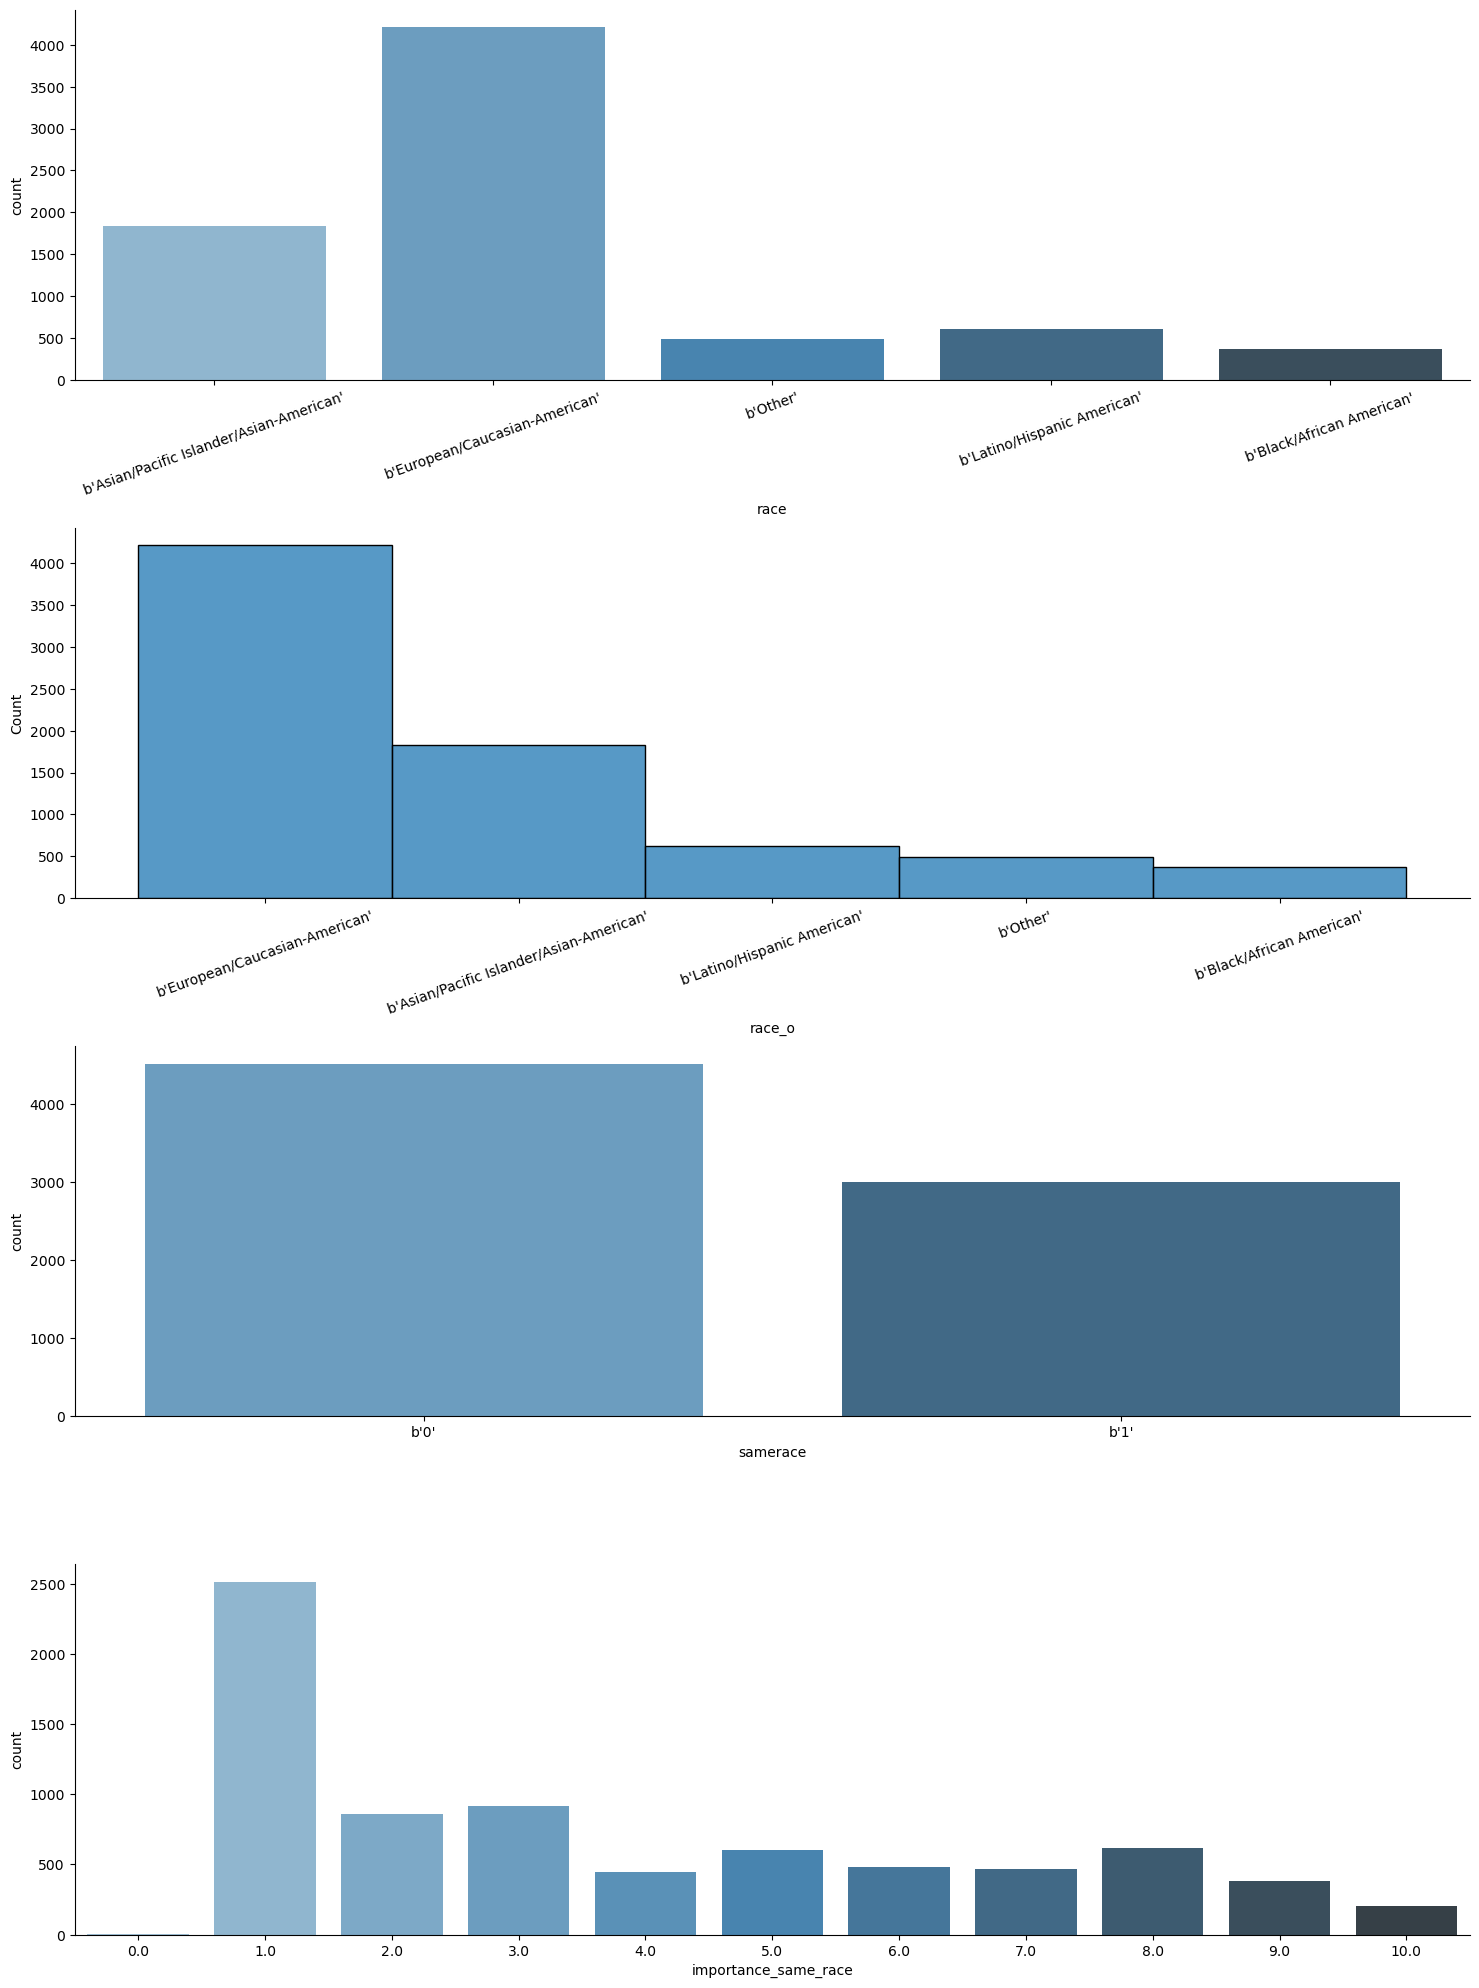

In [79]:
fig = plt.figure(figsize = (18, 25))
gs = fig.add_gridspec(4, 1) 
ax = [None for _ in range(4)]

ax[0] = plt.subplot2grid((4,1), (0,0), colspan=2)
sns.countplot(df['race'], palette="Blues_d")
sns.despine(top=True, right=True)
plt.xticks(rotation=20)

ax[1] = plt.subplot2grid((4,1), (1,0), colspan=2) 
sns.histplot(df['race_o'], palette="Blues_d")
sns.despine(top=True, right=True)
plt.xticks(rotation=20)

ax[2] = plt.subplot2grid((4,1), (2,0), colspan=2)
sns.countplot(df['samerace'], palette="Blues_d")
sns.despine(top=True, right=True)

ax[3] = plt.subplot2grid((4,1), (3,0), colspan=2)
sns.countplot(df['importance_same_race'], palette="Blues_d")
sns.despine(top=True, right=True)

plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

Очевидно, что 2 последних признака в целом отлично отразят как принадлежность к одной и той же расе, так и важность для знакомства, а именно сама раса участника нас не интересует.

In [80]:
transform_col_list = ["gender", "samerace", "field", "decision", "decision_o", "match"]
print(transform_col_list)
print('\n')
for i in transform_col_list:
    name = i+'_un_list'
    name = df[i].unique()
    print(i, ":", name)
    print('\n')

['gender', 'samerace', 'field', 'decision', 'decision_o', 'match']


gender : ["b'female'" "b'male'"]


samerace : ["b'0'" "b'1'"]


field : ["b'Law'" "b'law'" "b'Economics'" "b'Masters in Public Administration'"
 "b'Masters of Social Work&Education'" "b'Finance'" "b'Business'"
 "b'political science'" "b'money'" "b'Operations Research'"
 "b'TC [Health Ed]'" "b'Psychology'" "b'social work'" "b'Social Work'"
 "b'Speech Language Pathology'" "b'Educational Psychology'"
 "b'Applied Maths/Econs'" "b'Mathematics'" "b'Statistics'"
 "b'Organizational Psychology'" "b'Mechanical Engineering'" "b'Finanace'"
 "b'Finance&Economics'" "b'Undergrad - GS'" "b'Mathematical Finance'"
 "b'Medicine'" "b'MBA'" "b'LAW'" "b'psychology'" "b'German Literature'"
 "b'Business & International Affairs'" "b'MFA Creative Writing'"
 "b'Engineering'" "b'Electrical Engineering'" "b'Classics'"
 "b'Operations Research [SEAS]'" "b'chemistry'" "b'Journalism'"
 "b'Elementary/Childhood Education [MA]'" "b'microbiology'"
 "b'Ma

Особенности датасета указывают на то, что в нем нельзя "бинарить" признаки OneHotEncoder или чем-то подобным, так как что касается профессий,то очевидно, что какие-то из них являются для конкретного участника более приоритетными, и совершенно законно "тянут" выбор партнера на себя - признаки в статистике знакомств нельзя делать однородными.Присвоение порядковых номеров такому большому числу значений меня не смущает-по этому признаку нет балльной оценки, значит сторка просто превращается в "шифр". 
В бинарных столбцах не хочу терять соответствие, поэтому пойду сложным путем

In [81]:
df.loc[df['gender'] == "b'female'", 'gender'] = 0
df.loc[df['gender'] == "b'male'", 'gender'] = 1
df = df.astype({'gender': np.int})

In [82]:
df.loc[df['samerace'] == "b'0'", 'samerace'] = 0
df.loc[df['samerace'] == "b'1'", 'samerace'] = 1
df = df.astype({'samerace': np.int})

In [83]:
df.loc[df['decision'] == "b'0'", 'decision'] = 0
df.loc[df['decision'] == "b'1'", 'decision'] = 1
df = df.astype({'decision': np.int})

In [84]:
df.loc[df['decision_o'] == "b'0'", 'decision_o'] = 0
df.loc[df['decision_o'] == "b'1'", 'decision_o'] = 1
df = df.astype({'decision_o': np.int})

In [85]:
df.loc[df['match'] == "b'0'", 'match'] = 0
df.loc[df['match'] == "b'1'", 'match'] = 1
df = df.astype({'match': np.int})

в поле field применю factorize

In [87]:
df['field'] = pd.factorize(df.field)[0]

In [89]:
df.head(20)

,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'[2-5]',b'[2-5]',0,35.00,20.00,20.00,20.00,0.00,5.00,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,4.0,b'[0-4]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,1,0,0
1,0,21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'[2-5]',b'[2-5]',0,60.00,0.00,0.00,40.00,0.00,0.00,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,4.0,b'[0-4]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,1,0,0
2,0,21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',1,2.0,4.0,b'[2-5]',b'[2-5]',0,19.00,18.00,19.00,18.00,14.00,12.00,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',5.0,8.0,9.0,8.0,5.0,7.0,b'[0-5]',b'[6-8]',b'[9-10]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5

как видим, все получилось. Теперь удаляю ненужные категориальные поля при помощи цикла

In [96]:
for col in df.columns:
    loc = df.columns.get_loc(col)
    i = df.dtypes[col]
    if i == 'object':
        df.drop(df.columns[loc], axis = 1, inplace=True)
    else:
        print(i)

int32
float64
float64
float64
int32
float64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int32
int32
int32


In [98]:
df.shape

(7508, 63)

теперь в датафрейме 63 признака